In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
food_price = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\guvi\\WLD_RTFP_country_2023-11-27\\WLD_RTFP_country_2023-11-27.csv")

In [3]:
food_price

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-02-01
2,0.53,0.54,0.53,0.53,NaN,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,NaN,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,NaN,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
4818,2.77,2.81,2.73,2.81,-1.61,"Yemen, Rep.",YEM,2023-07-01
4819,2.86,2.90,2.81,2.81,-3.72,"Yemen, Rep.",YEM,2023-08-01
4820,2.82,2.86,2.77,2.83,-3.11,"Yemen, Rep.",YEM,2023-09-01
4821,2.87,2.91,2.83,2.83,-1.38,"Yemen, Rep.",YEM,2023-10-01


In [4]:
# checking the dataset shape
food_price.shape

(4823, 8)

In [5]:
# checking the null values  in dataset
food_price.isnull().sum()

Open          64
High          64
Low           64
Close         64
Inflation    364
country        0
ISO3           0
date           0
dtype: int64

In [6]:
# checking the datatypes
food_price.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Inflation    float64
country       object
ISO3          object
date          object
dtype: object

In [7]:
# checking the unique feature in country 
food_price['country'].value_counts()

country
Afghanistan                 203
Somalia                     203
Nigeria                     203
Niger                       203
Mozambique                  203
Mali                        203
Liberia                     203
Burundi                     203
Lao PDR                     203
South Sudan                 203
Haiti                       203
Guinea-Bissau               203
Gambia, The                 203
Chad                        203
Congo, Dem. Rep.            203
Cameroon                    203
Central African Republic    203
Burkina Faso                203
Sudan                       203
Myanmar                     191
Yemen, Rep.                 179
Syrian Arab Republic        155
Congo, Rep.                 155
Iraq                        143
Lebanon                     143
Name: count, dtype: int64

In [8]:
# handling the null values using groupy method find the country wise Inflation mean 
mean_inflation = food_price.groupby('country')['Inflation'].mean()
mean_inflation

country
Afghanistan                  7.534974
Burkina Faso                 8.543403
Burundi                      9.015497
Cameroon                     2.698816
Central African Republic     7.084450
Chad                         4.138743
Congo, Dem. Rep.            12.415759
Congo, Rep.                  1.623217
Gambia, The                  6.951937
Guinea-Bissau                2.306230
Haiti                       15.735654
Iraq                         1.519924
Lao PDR                      7.145663
Lebanon                     55.553435
Liberia                      7.732513
Mali                         4.554398
Mozambique                   8.778115
Myanmar                     12.226425
Niger                        4.196387
Nigeria                     11.013979
Somalia                      6.789476
South Sudan                 63.348796
Sudan                       64.380733
Syrian Arab Republic        45.229021
Yemen, Rep.                 13.670719
Name: Inflation, dtype: float64

In [9]:
# #Handling the missing values fillna method lambda using mean values
food_price['Open'] = food_price.groupby('country')['Open'].transform(lambda x: x.fillna(x.mean()))
food_price['High'] = food_price.groupby('country')['High'].transform(lambda x: x.fillna(x.mean()))
food_price['Low'] = food_price.groupby('country')['Low'].transform(lambda x: x.fillna(x.mean()))
food_price['Close'] = food_price.groupby('country')['Close'].transform(lambda x: x.fillna(x.mean()))
food_price['Inflation'] = food_price.groupby('country')['Inflation'].transform(lambda x: x.fillna(x.mean()))

In [10]:
food_price

,Open,High,Low,Close,Inflation,country,ISO3,date
0,0.53,0.54,0.53,0.53,7.534974,Afghanistan,AFG,2007-01-01
1,0.53,0.54,0.53,0.53,7.534974,Afghanistan,AFG,2007-02-01
2,0.53,0.54,0.53,0.53,7.534974,Afghanistan,AFG,2007-03-01
3,0.53,0.55,0.53,0.55,7.534974,Afghanistan,AFG,2007-04-01
4,0.56,0.57,0.56,0.57,7.534974,Afghanistan,AFG,2007-05-01
...,...,...,...,...,...,...,...,...
4818,2.77,2.81,2.73,2.81,-1.610000,"Yemen, Rep.",YEM,2023-07-01
4819,2.86,2.90,2.81,2.81,-3.720000,"Yemen, Rep.",YEM,2023-08-01
4820,2.82,2.86,2.77,2.83,-3.110000,"Yemen, Rep.",YEM,2023-09-01
4821,2.87,2.91,2.83,2.83,-1.380000,"Yemen, Rep.",YEM,2023-10-01


# Data Preprocessing:

In [11]:
# changing cat value to numerical values using label encoder
label_encoder = LabelEncoder()
food_price['country'] = label_encoder.fit_transform(food_price['country'])

In [12]:
# date Extracting Components:
food_price['date'] = pd.to_datetime(food_price['date'])
food_price['year'] = food_price['date'].dt.year
food_price['month'] = food_price['date'].dt.month
food_price['day'] = food_price['date'].dt.day
food_price

,Open,High,Low,Close,Inflation,country,ISO3,date,year,month,day
0,0.53,0.54,0.53,0.53,7.534974,0,AFG,2007-01-01,2007,1,1
1,0.53,0.54,0.53,0.53,7.534974,0,AFG,2007-02-01,2007,2,1
2,0.53,0.54,0.53,0.53,7.534974,0,AFG,2007-03-01,2007,3,1
3,0.53,0.55,0.53,0.55,7.534974,0,AFG,2007-04-01,2007,4,1
4,0.56,0.57,0.56,0.57,7.534974,0,AFG,2007-05-01,2007,5,1
...,...,...,...,...,...,...,...,...,...,...,...
4818,2.77,2.81,2.73,2.81,-1.610000,24,YEM,2023-07-01,2023,7,1
4819,2.86,2.90,2.81,2.81,-3.720000,24,YEM,2023-08-01,2023,8,1
4820,2.82,2.86,2.77,2.83,-3.110000,24,YEM,2023-09-01,2023,9,1
4821,2.87,2.91,2.83,2.83,-1.380000,24,YEM,2023-10-01,2023,10,1


In [13]:
food_price.drop(['ISO3','date'],axis = 1,inplace = True)
food_price

,Open,High,Low,Close,Inflation,country,year,month,day
0,0.53,0.54,0.53,0.53,7.534974,0,2007,1,1
1,0.53,0.54,0.53,0.53,7.534974,0,2007,2,1
2,0.53,0.54,0.53,0.53,7.534974,0,2007,3,1
3,0.53,0.55,0.53,0.55,7.534974,0,2007,4,1
4,0.56,0.57,0.56,0.57,7.534974,0,2007,5,1
...,...,...,...,...,...,...,...,...,...
4818,2.77,2.81,2.73,2.81,-1.610000,24,2023,7,1
4819,2.86,2.90,2.81,2.81,-3.720000,24,2023,8,1
4820,2.82,2.86,2.77,2.83,-3.110000,24,2023,9,1
4821,2.87,2.91,2.83,2.83,-1.380000,24,2023,10,1


# EDA PART

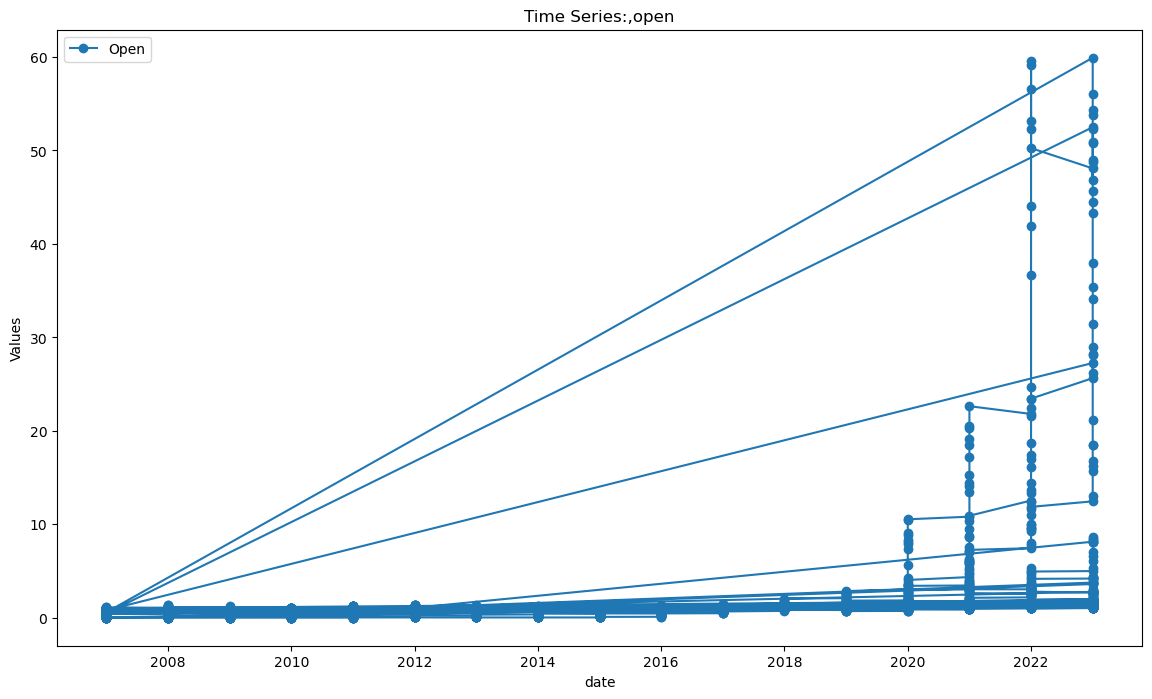

In [14]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['Open'], label='Open',marker='o')

plt.title('Time Series:,open')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

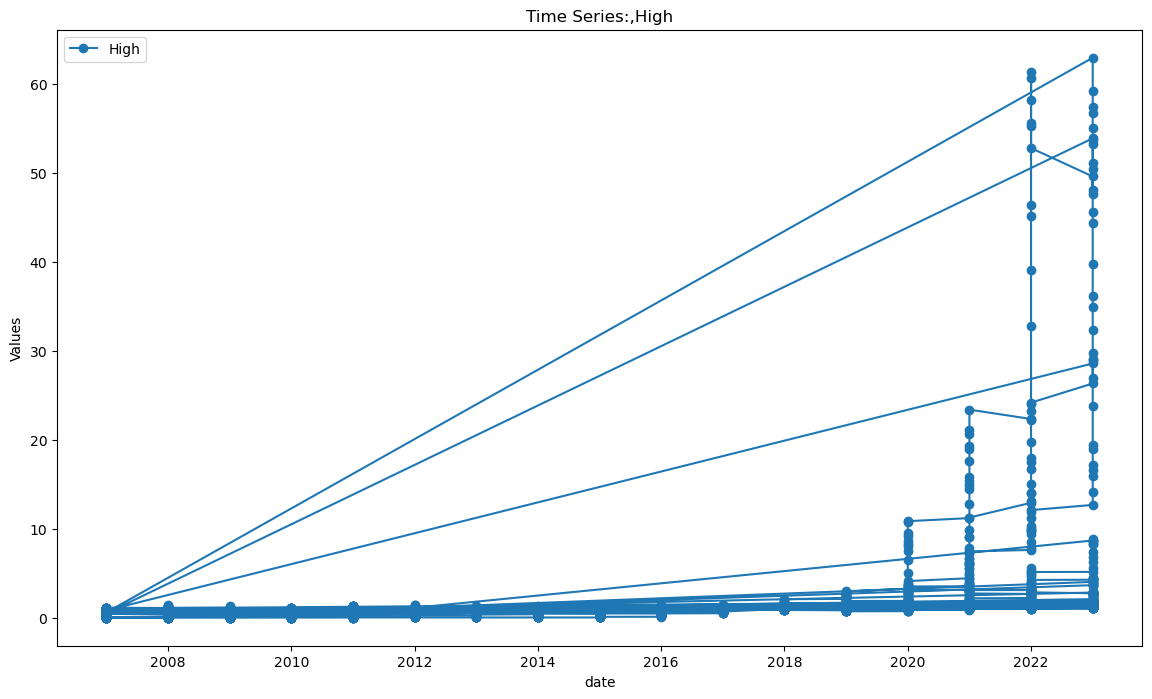

In [15]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['High'], label='High',marker='o')

plt.title('Time Series:,High')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

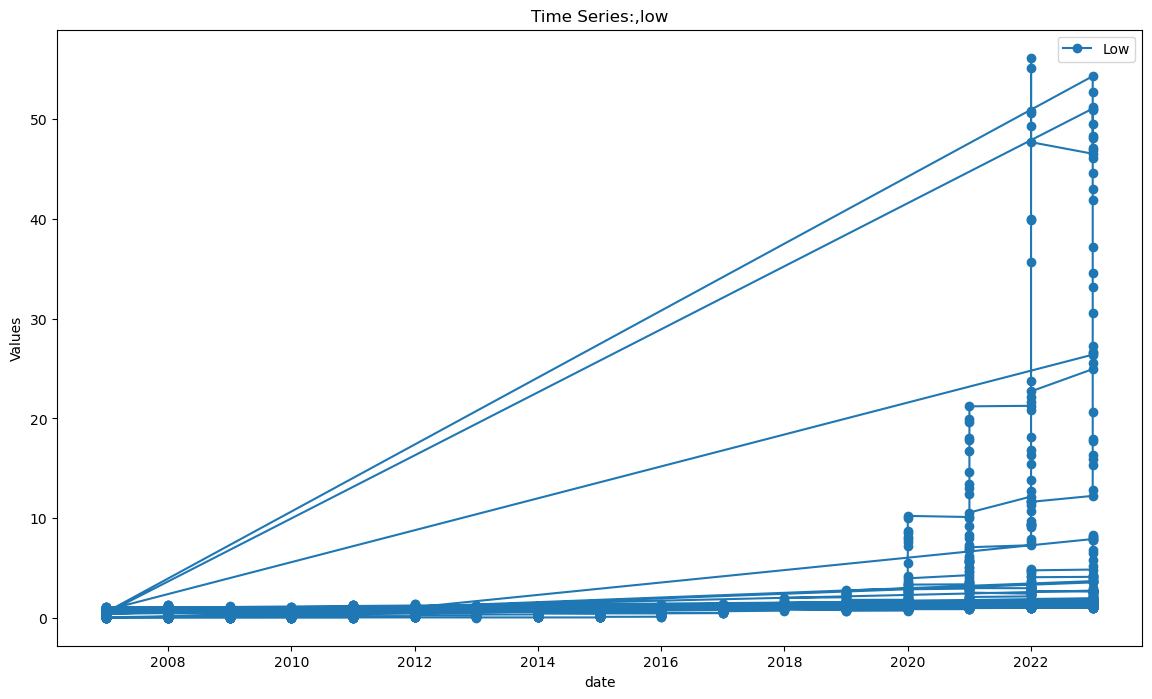

In [16]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['Low'], label='Low',marker='o')

plt.title('Time Series:,low')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

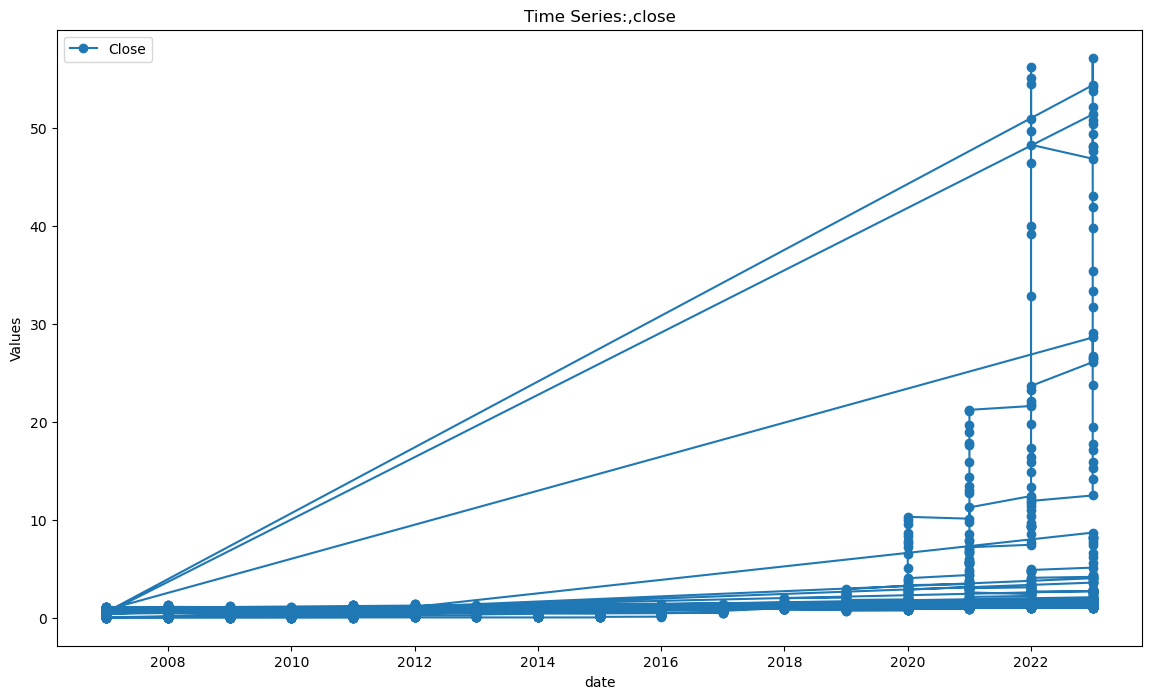

In [17]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['Close'], label='Close',marker='o')

plt.title('Time Series:,close')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

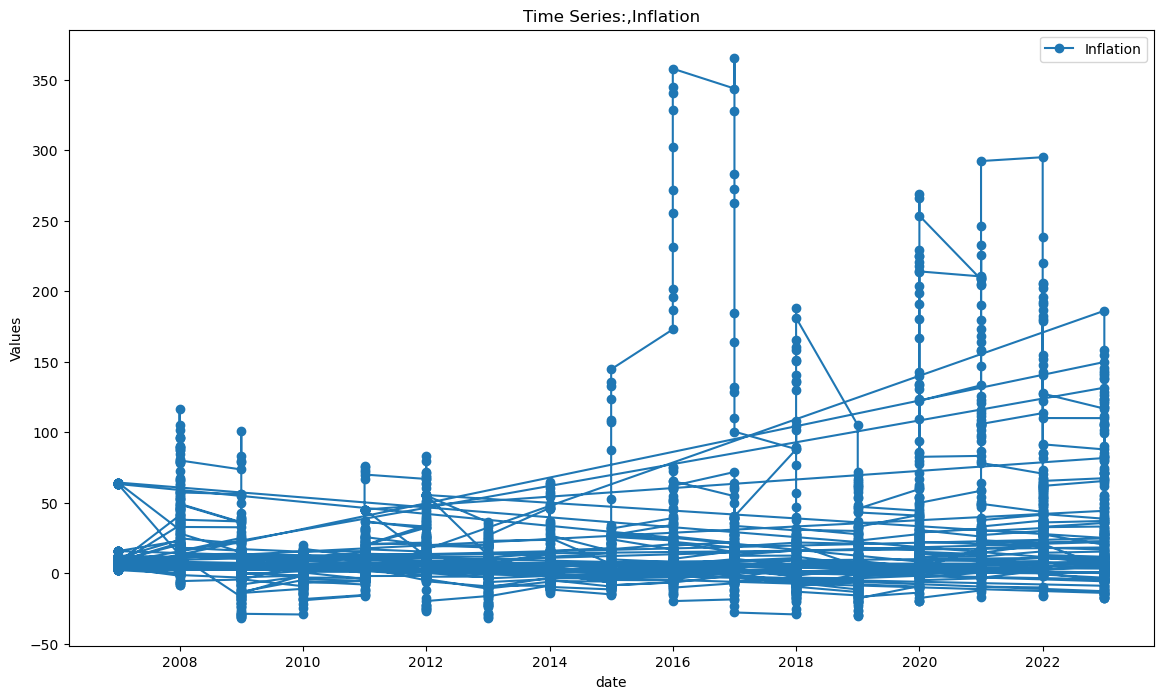

In [18]:
plt.figure(figsize=(14, 8))
plt.plot(food_price['year'], food_price['Inflation'], label='Inflation',marker='o')

plt.title('Time Series:,Inflation')
plt.xlabel('date')
plt.ylabel('Values')
plt.legend()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


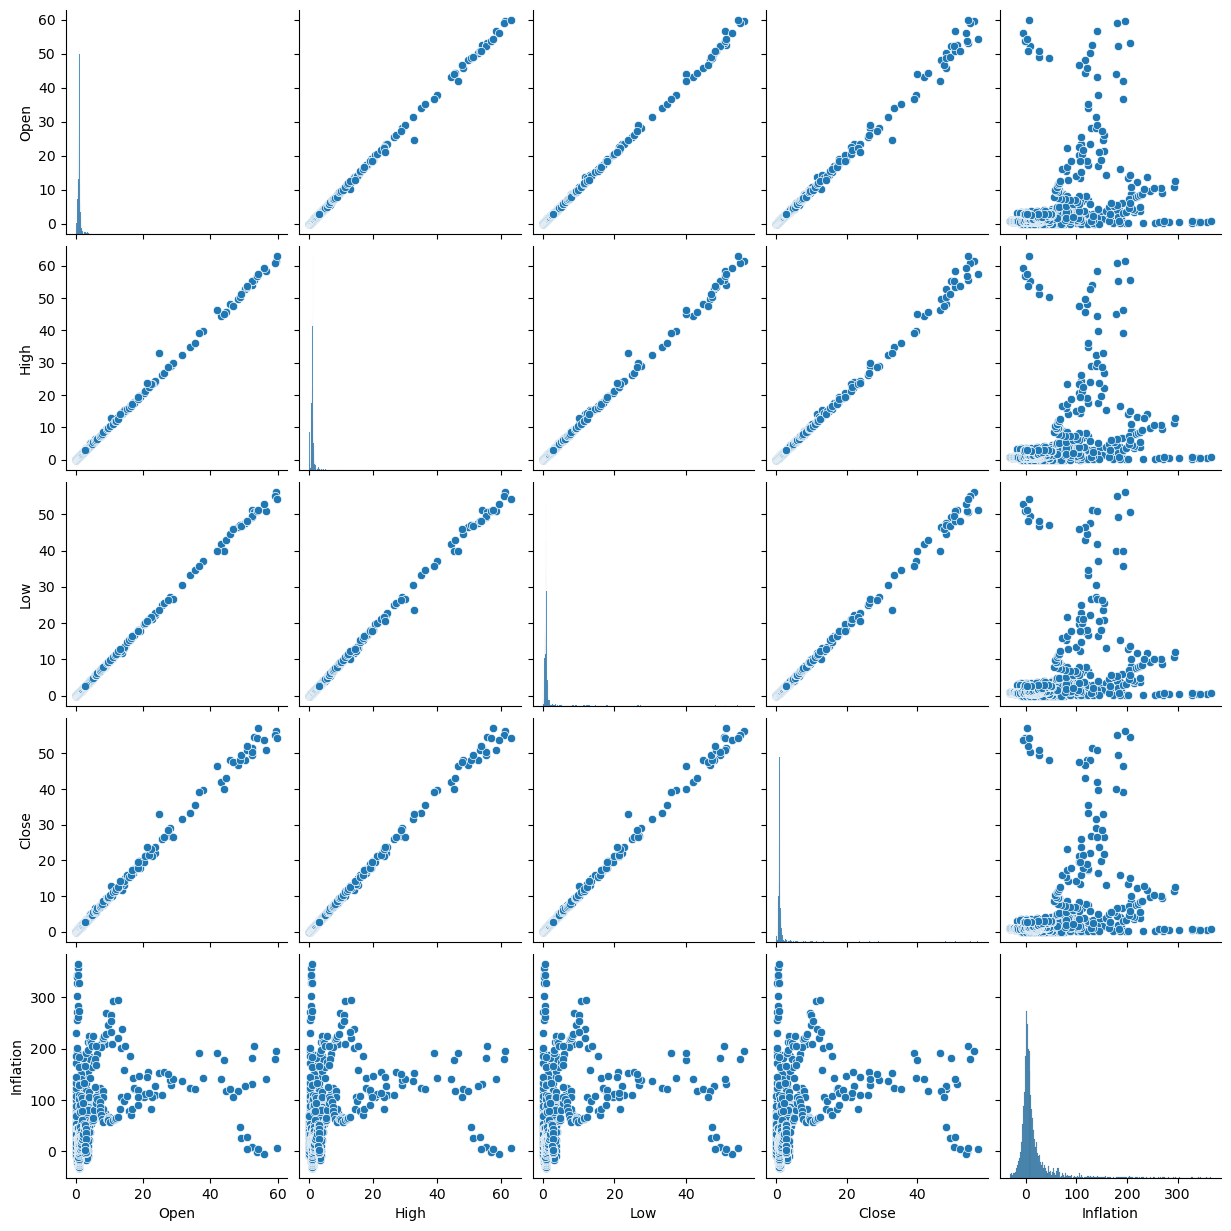

In [19]:
sns.pairplot(food_price[['Open', 'High', 'Low','Close', 'Inflation']])
plt.show()

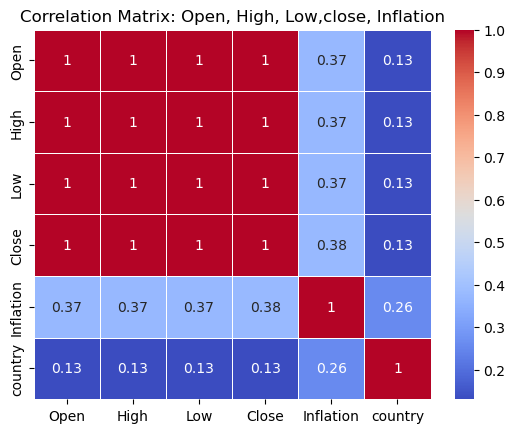

In [20]:
# Correlation by Heatmap 
correlation_matrix = food_price[['Open', 'High', 'Low','Close', 'Inflation','country']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Open, High, Low,close, Inflation')
plt.show()

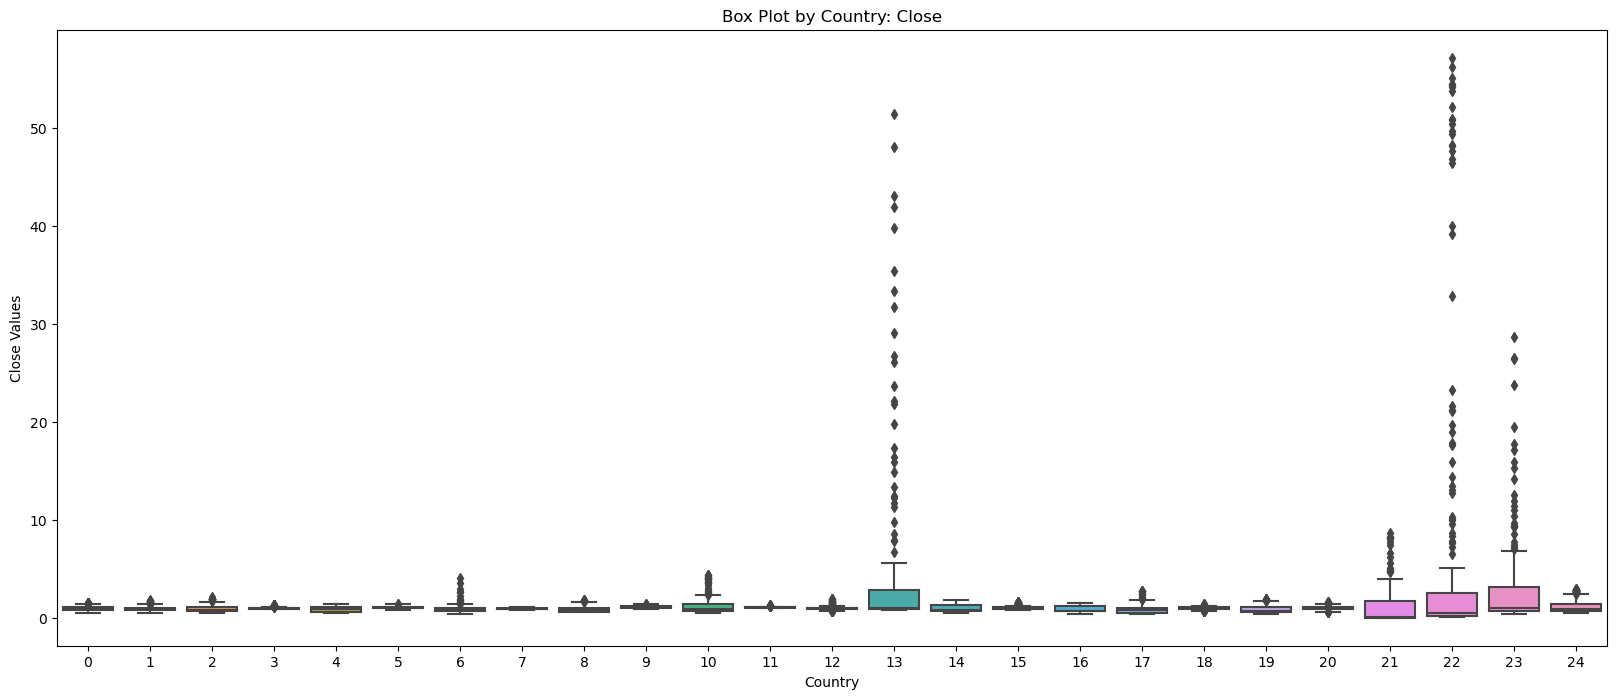

In [21]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='country', y='Close', data=food_price)
plt.title('Box Plot by Country: Close')
plt.xlabel('Country')
plt.ylabel('Close Values')
plt.show()

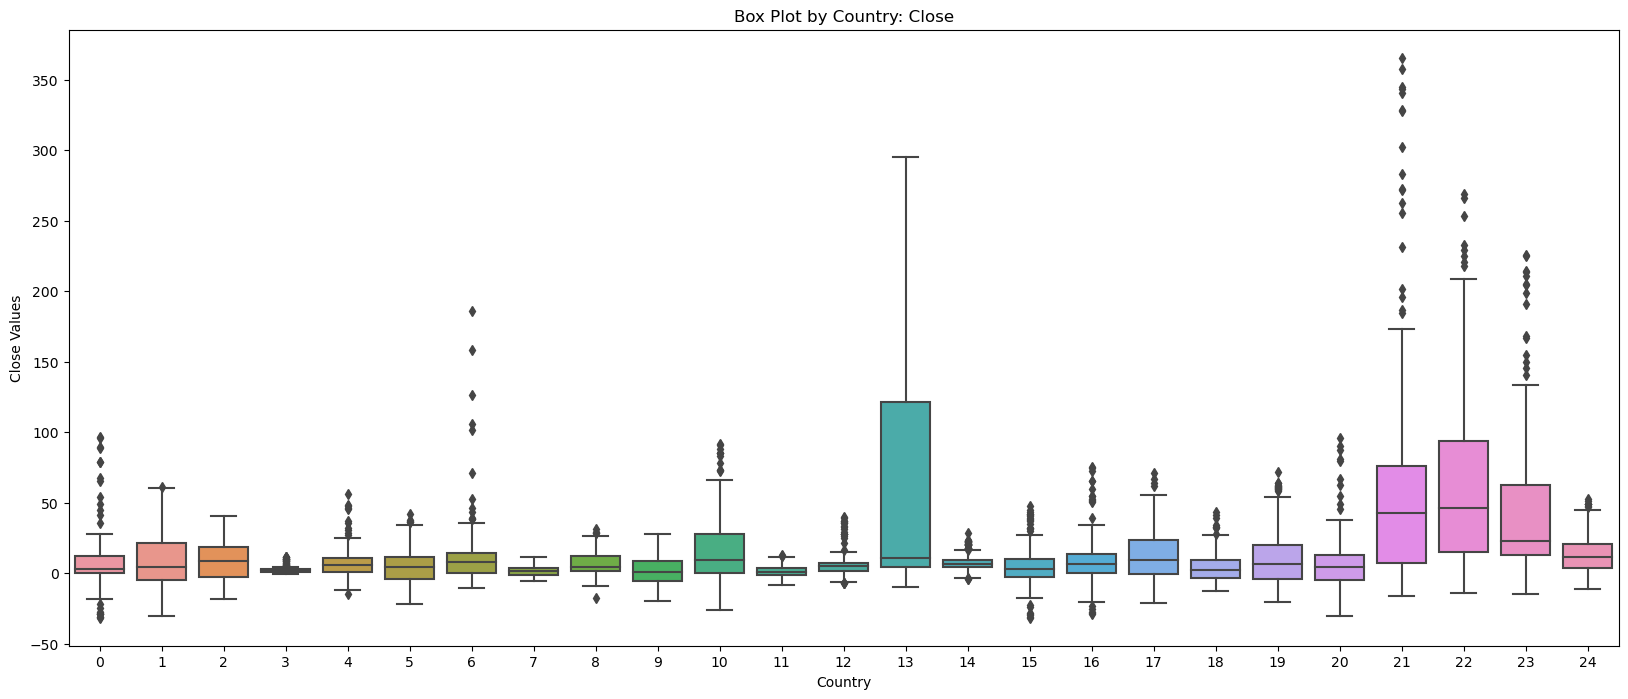

In [22]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='country', y='Inflation', data=food_price)
plt.title('Box Plot by Country: Close')
plt.xlabel('Country')
plt.ylabel('Close Values')
plt.show()

<Axes: xlabel='year', ylabel='Inflation'>

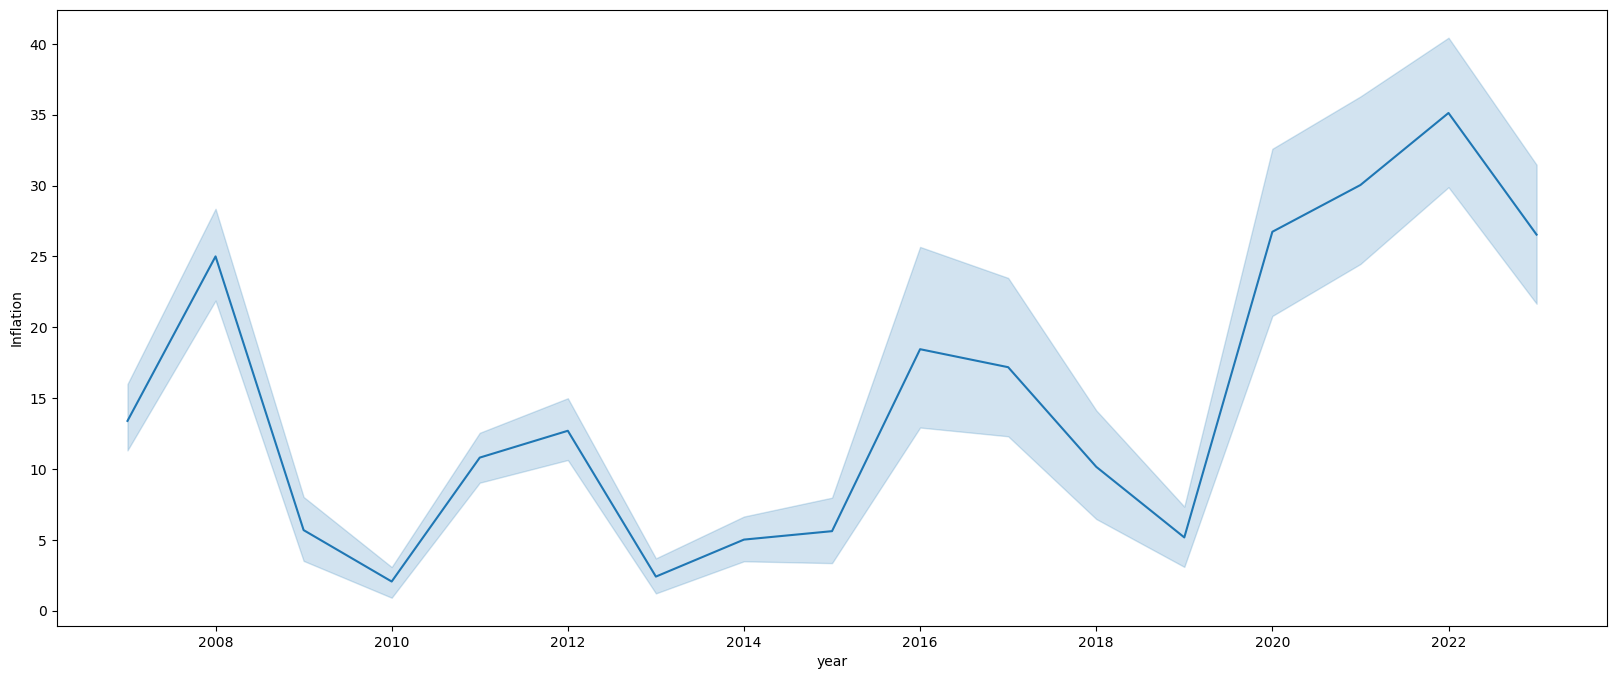

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(x ='year',y='Inflation',data = food_price )

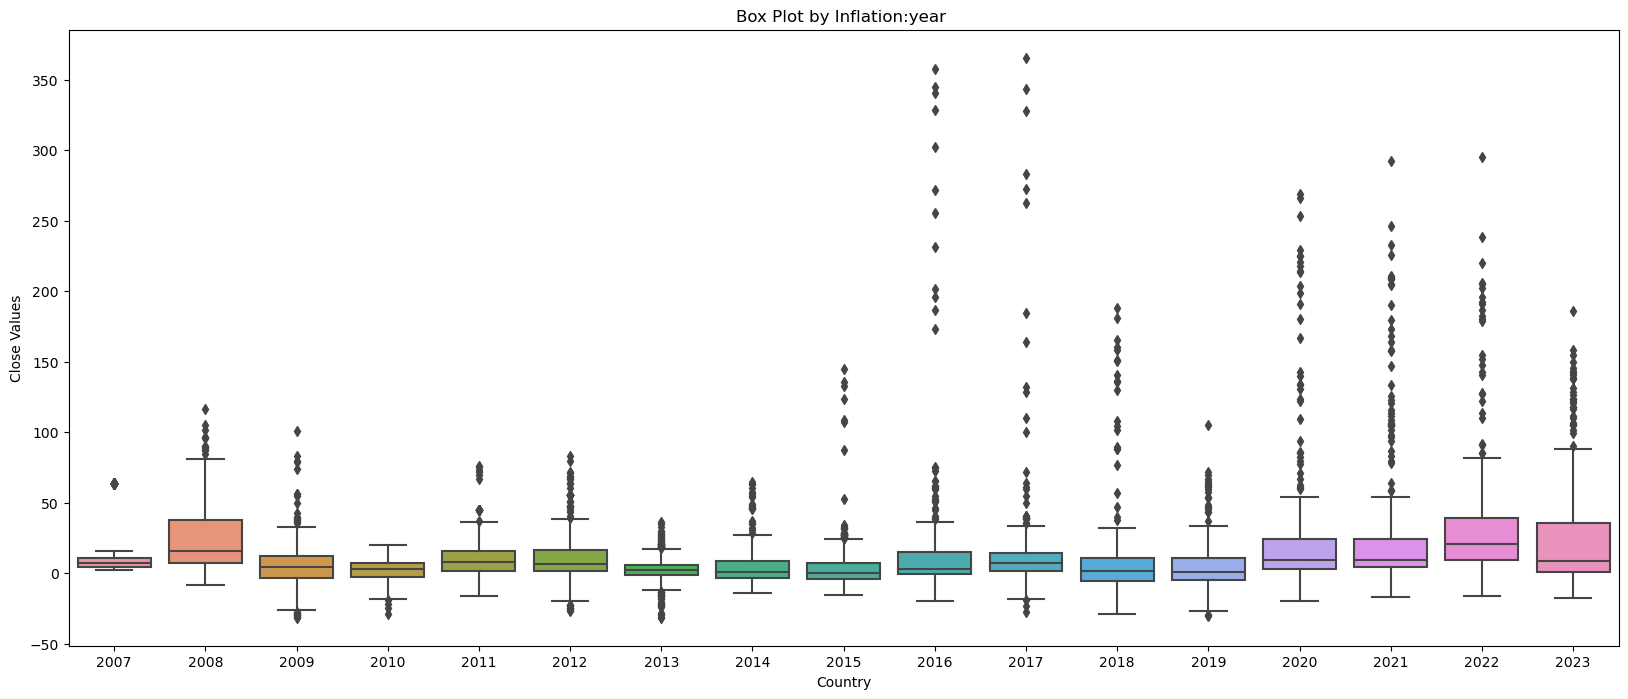

In [24]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='year', y='Inflation', data=food_price)
plt.title('Box Plot by Inflation:year ')
plt.xlabel('Country')
plt.ylabel('Close Values')
plt.show()

# Model Building

In [35]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [26]:
x = food_price[['Open', 'High', 'Low', 'Close', 'country','year','month','day']]
y = food_price['Inflation']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
 # fit the RandomForestRegressor model
RFR = RandomForestRegressor() 
RFR = RandomForestRegressor(n_estimators= 50,random_state= 0)
RFR.fit(x_test,y_test)

y_train_pred = RFR.predict(x_train)
y_test_pred =  RFR.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
r2_train, r2_test

     

(0.7167915139707268, 0.9634531824718597)

In [27]:
x = food_price[['Open', 'High', 'Low', 'Close', 'country','year','month','day']]
y = food_price['Inflation']
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the XGBoost model

model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred =  model.predict(x_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
r2_train, r2_test



(0.9522700422753314, 0.8745121861003433)

# Hyperparameter Tuning:

In [28]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='r2', cv=3)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(x_test)




Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}


In [43]:



# Create and train the final XGBoost model with the best hyperparameters
final_model = xgb.XGBRegressor(objective='reg:squarederror',
                               n_estimators=150,
                               learning_rate=0.2,
                               max_depth=5,
                               random_state=42)

final_model.fit(x_train_scaled, y_train)

# Make predictions on training and testing sets
y_train_pred = final_model.predict(x_train_scaled)
y_test_pred = final_model.predict(x_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_train,r2_test


(0.9757112348755073, 0.8926039557187603)

In [45]:
 # predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the final XGBoost model with the best hyperparameters
final_model = xgb.XGBRegressor(objective='reg:squarederror',
                               n_estimators=150,
                               learning_rate=0.2,
                               max_depth=5,
                               random_state=42)

final_model.fit(x_train_scaled, y_train)



final_model.fit(x_train,y_train)

y_pred_train = final_model.predict(x_train)
y_pred_test = final_model.predict(x_test)                      
print('Mean Squared Error:' ,mean_squared_error(y_test,y_pred_test))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print(r2_score(y_test,y_pred_test))

Mean Squared Error: 132.79830864331365
Mean Absolute Error: 6.673079327886051
Root Mean Squared Error: 11.523814847667142
0.8926039557187603


In [46]:
user_data = np.array([[2.77, 2.81, 2.73, 2.81, 24, 2023, 7, 1]])
y_p = final_model.predict(user_data)
print(y_p[0])

3.4989712


In [47]:
import pickle
# save the regression model by using pickle

with open("C:\\Users\\User\\OneDrive\\Desktop\\project files\\food_price_model.pkl", 'wb') as f:
    pickle.dump(final_model, f)


In [48]:


# Load the model
with open("C:\\Users\\User\\OneDrive\\Desktop\\project files\\food_price_model.pkl", 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[0.53, 0.55, 0.53, 0.55, 0, 2007, 4, 1]])


prediction = model.predict(user_data)
inflation = prediction[0]

print("Predicted Inflation:", inflation)


Predicted Inflation: 6.7265515
